In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('sales_weather.xlsx', sheet_name='records')

In [3]:

df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time
df.dtypes

transaction_id                  int64
transaction_date       datetime64[ns]
transaction_time               object
transaction_qty                 int64
store_id                        int64
store_location                 object
product_id                      int64
unit_price                    float64
product_category               object
product_type                   object
product_detail                 object
Item                           object
Cost                          float64
sales                         float64
merge                         float64
profit                        float64
temperature                     int64
rainfall                      float64
weather_description            object
dtype: object

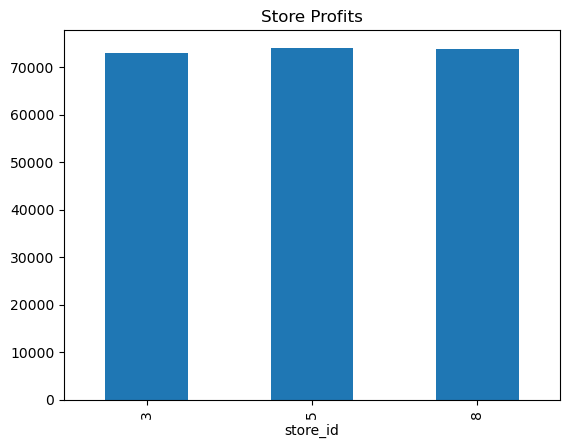

In [4]:
grouped_store = df.groupby('store_id')['profit'].sum()
grouped_store.plot(kind='bar')
plt.title('Store Profits')
plt.show()

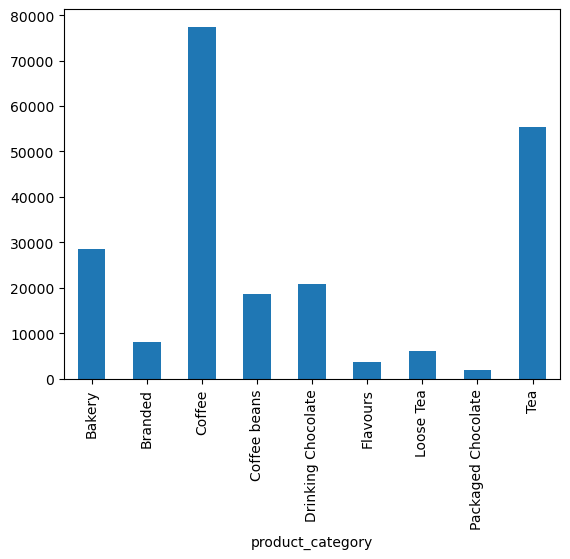

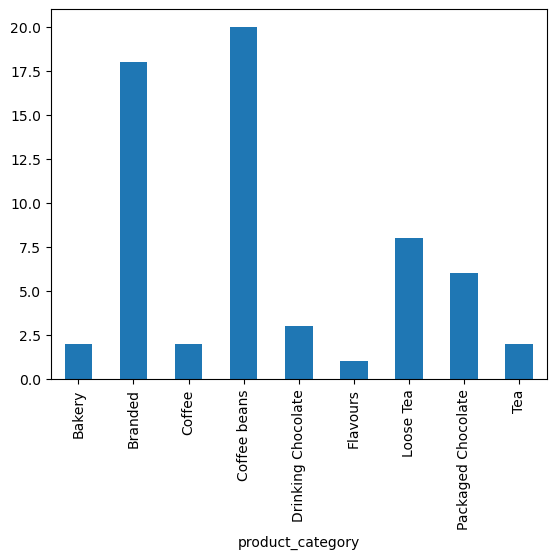

In [5]:
grouped_store = df.groupby('product_category')['profit'].agg(['sum','mean'])
grouped_store = round(grouped_store)

for x in grouped_store.columns:
    grouped_df = grouped_store[x]
    grouped_df.plot(kind='bar')
    plt.show()


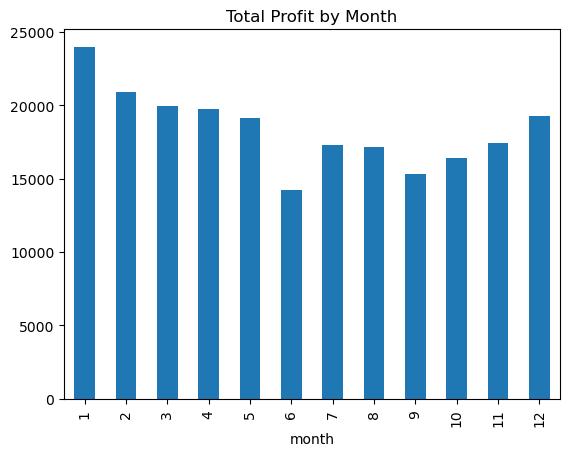

In [13]:
df['month'] = df['transaction_date'].dt.month
df_month = df.groupby('month')['profit'].sum()
df_month.plot(kind='bar', title='Total Profit by Month')
plt.show()

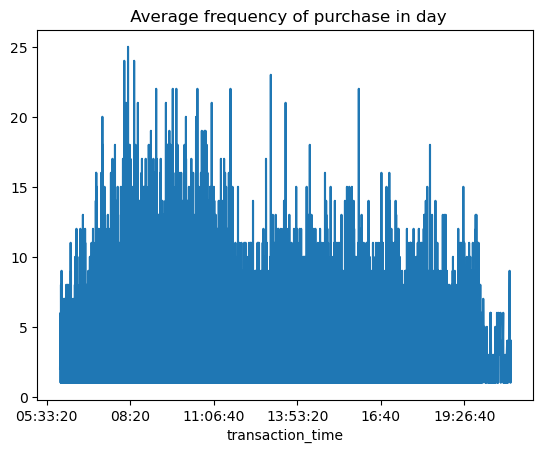

In [7]:
df_grouped_time = df.groupby('transaction_time')['transaction_id'].count()
df_grouped_time.plot(kind='line', title=' Average frequency of purchase in day')
plt.show()

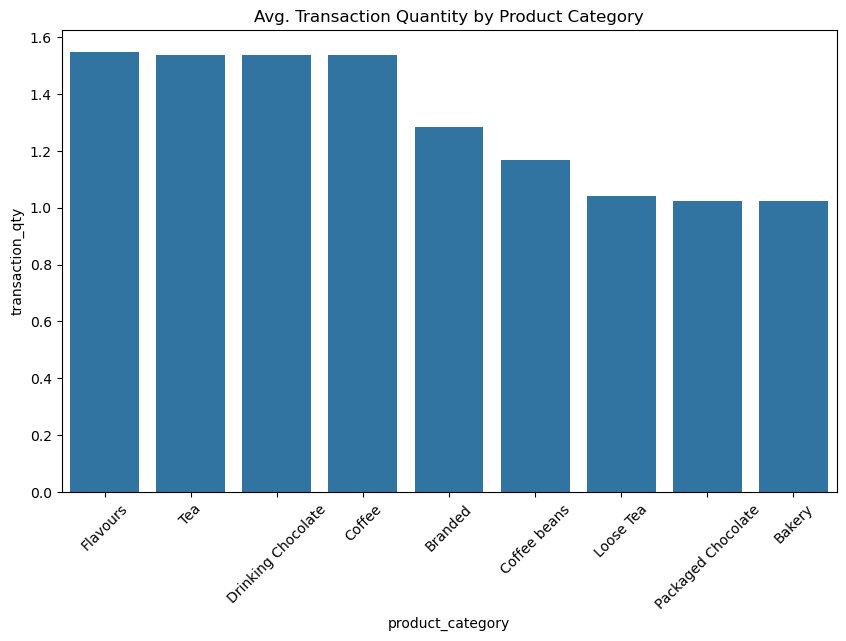

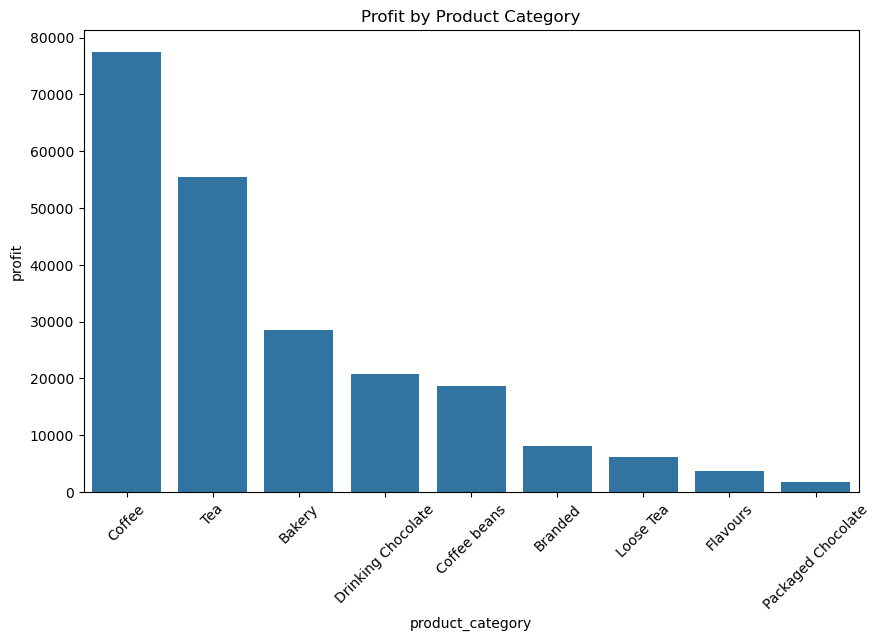

In [12]:
category_pivot = df.groupby('product_category')[['transaction_qty', 'profit']].agg({'transaction_qty': 'mean', 'profit': 'sum'}).reset_index()

# Sort the data by 'transaction_qty' and 'profit'
category_pivot_qty_sorted = category_pivot.sort_values('transaction_qty', ascending=False)
category_pivot_profit_sorted = category_pivot.sort_values('profit', ascending=False)

# Create a barplot for transaction quantity
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category', y='transaction_qty', data=category_pivot_qty_sorted)
plt.title('Avg. Transaction Quantity by Product Category')
plt.xticks(rotation=45)
plt.show()

# Create a barplot for profit
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category', y='profit', data=category_pivot_profit_sorted)
plt.title('Profit by Product Category')
plt.xticks(rotation=45)
plt.show()

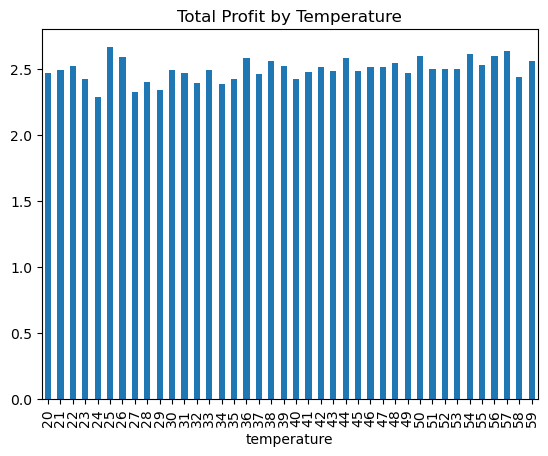

In [9]:
grouped_data = df.groupby('temperature')['profit'].mean()

# Plot the total profit by temperature as a bar plot
grouped_data.plot(kind='bar')
plt.title('Total Profit by Temperature')
plt.show()

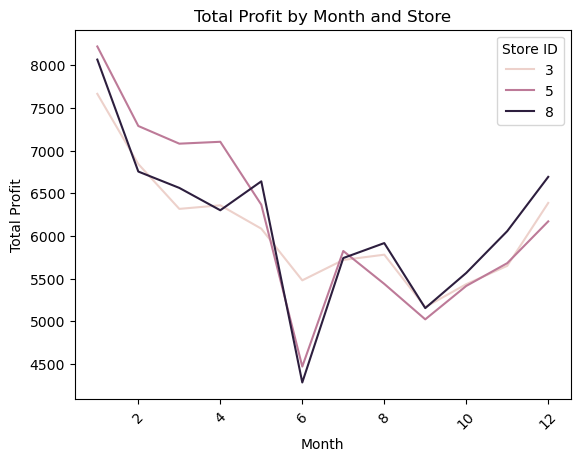

In [16]:
df['month'] = df['transaction_date'].dt.month

# Group by 'month' and 'store_id' and sum the profits
df_month = df.groupby(['month', 'store_id'])['profit'].sum().reset_index()

# Create a barplot
sns.lineplot(data=df_month, x='month', y='profit', hue='store_id')

# Show the plot
plt.title('Total Profit by Month and Store')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)  # Rotate month labels for readability
plt.legend(title='Store ID')
plt.show()